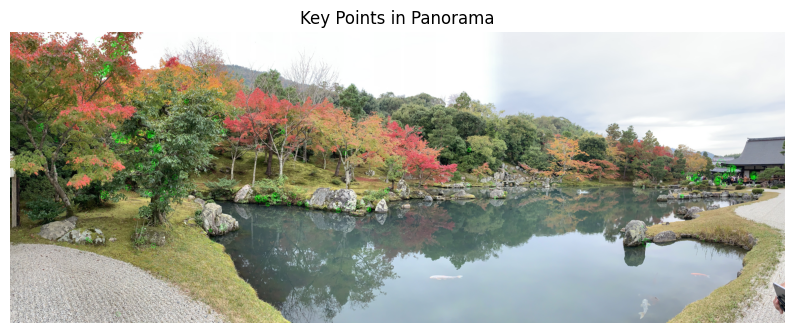

[ WARN:0@2.307] global loadsave.cpp:241 findDecoder imread_('image2.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load panorama image
img = cv2.imread("panorama.jpg")

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 1: Extract Key Points and Descriptors using ORB
orb = cv2.ORB_create()

# Detect key points and descriptors
keypoints, descriptors = orb.detectAndCompute(gray, None)

# Step 2: Draw Key Points on the Image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

# Display the key points on the image
plt.figure(figsize=(10, 7))
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("Key Points in Panorama")
plt.axis('off')
plt.show()

# Step 3: Feature Matching (If you have another image to compare with)
# For illustration, assume we have another image (`img2.jpg`) that we want to match with the panorama.

# Load another image (you can change this part as per your requirement)
img2 = cv2.imread("image2.jpg")
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Detect key points and descriptors in the second image
keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

# Match features using BFMatcher (Brute Force)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors, descriptors2)

# Sort the matches by distance (smaller distance means better match)
matches = sorted(matches, key=lambda x: x.distance)

# Step 4: Draw Matches
img_matches = cv2.drawMatches(img, keypoints, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches between the panorama and the second image
plt.figure(figsize=(12, 7))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title("Feature Matches Between Panorama and Image")
plt.axis('off')
plt.show()

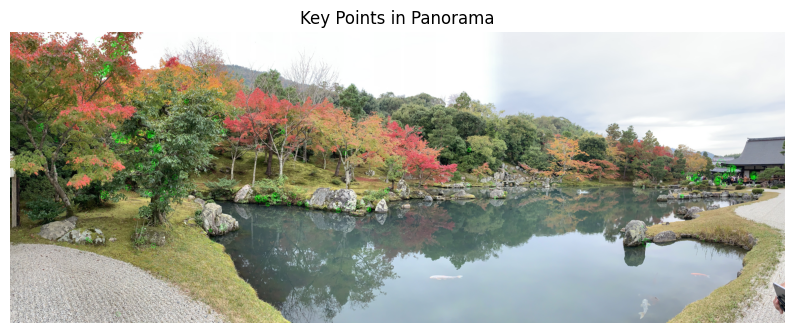

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load panorama image
img = cv2.imread("panorama.jpg")

# Convert image to grayscale (key point extraction works better on grayscale)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 1: Extract Key Points and Descriptors using ORB
orb = cv2.ORB_create()

# Detect key points and descriptors
keypoints, descriptors = orb.detectAndCompute(gray, None)

# Step 2: Draw Key Points on the Image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

# Display the key points on the image
plt.figure(figsize=(10, 7))
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("Key Points in Panorama")
plt.axis('off')
plt.show()

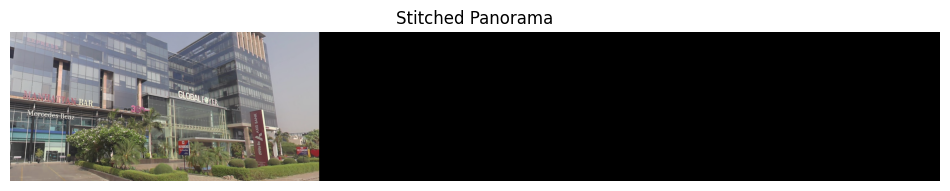

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def stitch_images(images):
    # Convert images to grayscale
    gray_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and descriptors
    keypoints_descriptors = [orb.detectAndCompute(gray, None) for gray in gray_images]
    keypoints = [kp_desc[0] for kp_desc in keypoints_descriptors]
    descriptors = [kp_desc[1] for kp_desc in keypoints_descriptors]

    # BFMatcher to match descriptors
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors between consecutive images
    matches = []
    for i in range(len(images) - 1):
        match = bf.match(descriptors[i], descriptors[i+1])
        match = sorted(match, key=lambda x: x.distance)  # Sort matches by distance
        matches.append(match)

    # Start stitching process
    panorama = images[0]
    for i in range(len(matches)):
        # Extract matched keypoints
        src_pts = np.float32([keypoints[i][m.queryIdx].pt for m in matches[i]]).reshape(-1, 1, 2)
        dst_pts = np.float32([keypoints[i+1][m.trainIdx].pt for m in matches[i]]).reshape(-1, 1, 2)

        # Compute Homography matrix
        H, _ = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC)

        # Get dimensions for output panorama
        height, width = panorama.shape[:2]
        next_h, next_w = images[i+1].shape[:2]
        panorama_w = width + next_w  # Expand width to accommodate next image

        # Warp the next image
        warped_image = cv2.warpPerspective(images[i+1], H, (panorama_w, height))

        # Blend by placing the previous panorama on top
        warped_image[0:height, 0:width] = panorama
        panorama = warped_image  # Update panorama with the new stitched result

    return panorama

# Load your images
image1 = cv2.imread("img1.jpg")
image2 = cv2.imread("img2.jpg")
image3 = cv2.imread("img3.jpg")

# Check if images are loaded correctly
if image1 is None or image2 is None or image3 is None:
    print("Error: One or more images could not be loaded. Check the file paths.")
else:
    # Stitch images together
    panorama = stitch_images([image1, image2, image3])

    # Save the result
    cv2.imwrite("panorama.jpg", panorama)

    # Convert BGR to RGB for displaying with Matplotlib
    panorama_rgb = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)

    # Display the stitched image within the code
    plt.figure(figsize=(12, 6))
    plt.imshow(panorama_rgb)
    plt.axis("off")  # Hide axes
    plt.title("Stitched Panorama")
    plt.show()

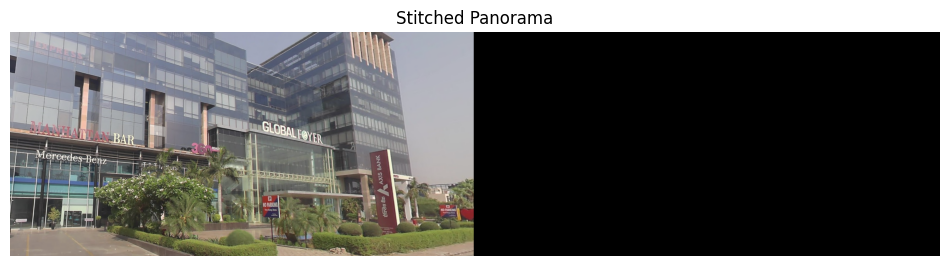

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def stitch_images(img1, img2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and descriptors
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    # BFMatcher with cross-checking
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)  # Sort matches by distance

    if len(matches) < 4:
        print("Not enough matches found for stitching.")
        return None

    # Extract matched keypoints
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Compute Homography matrix
    H, _ = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC)

    # Get dimensions for output panorama
    height, width = image1.shape[:2]
    panorama_w = width + image2.shape[1]

    # Warp the second image
    warped_image = cv2.warpPerspective(image2, H, (panorama_w, height))

    # Blend by placing the first image on top
    warped_image[0:height, 0:width] = image1
    
    return warped_image

# Load your images
image1 = cv2.imread("img1.jpg")
image2 = cv2.imread("img2.jpg")

# Check if images are loaded correctly
if image1 is None or image2 is None:
    print("Error: One or both images could not be loaded. Check the file paths.")
else:
    # Stitch images together
    panorama = stitch_images(image1, image2)

    if panorama is not None:
        # Save the result
        cv2.imwrite("panorama.jpg", panorama)

        # Convert BGR to RGB for displaying with Matplotlib
        panorama_rgb = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)

        # Display the stitched image
        plt.figure(figsize=(12, 6))
        plt.imshow(panorama_rgb)
        plt.axis("off")  # Hide axes
        plt.title("Stitched Panorama")
        plt.show()


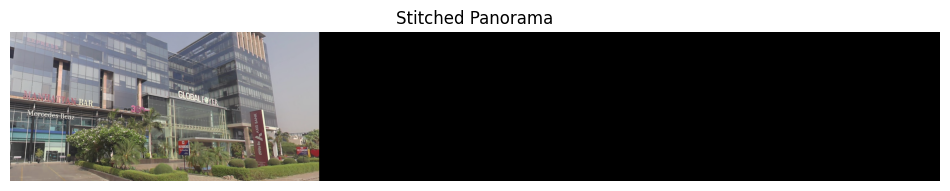

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def stitch_images(img1, img2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and descriptors
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    # BFMatcher to match descriptors
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)

    # Extract matched keypoints
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Compute Homography matrix
    H, _ = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC)

    # Warp the second image
    height1, width1 = img1.shape[:2]
    height2, width2 = img2.shape[:2]
    panorama_width = width1 + width2
    panorama_height = max(height1, height2)

    panorama = cv2.warpPerspective(img2, H, (panorama_width, panorama_height))
    panorama[0:height1, 0:width1] = img1

    return panorama

# Load images
image1 = cv2.imread("img1.jpg")
image2 = cv2.imread("img2.jpg")
image3 = cv2.imread("img3.jpg")

# Check if images are loaded correctly
if image1 is None or image2 is None or image3 is None:
    print("Error: One or more images could not be loaded. Check the file paths.")
else:
    # Stitch images together
    panorama1 = stitch_images(image1, image2)
    panorama = stitch_images(panorama1, image3)

    # Save the result
    cv2.imwrite("panorama.jpg", panorama)

    # Convert BGR to RGB for displaying with Matplotlib
    panorama_rgb = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)

    # Display the stitched image
    plt.figure(figsize=(12, 6))
    plt.imshow(panorama_rgb)
    plt.axis("off")  # Hide axes
    plt.title("Stitched Panorama")
    plt.show()


Keypoints in Image 1: 500, Image 2: 500
Keypoints in Image 1: 500, Image 2: 500


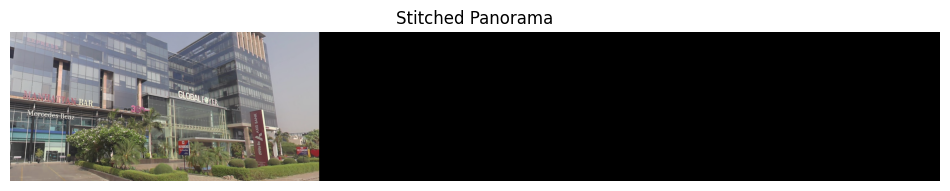

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def stitch_images(img1, img2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and descriptors
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    print(f"Keypoints in Image 1: {len(keypoints1)}, Image 2: {len(keypoints2)}")

    if descriptors1 is None or descriptors2 is None:
        print("Error: Descriptors not found in one or both images.")
        return None

    # BFMatcher to match descriptors
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)

    if len(matches) < 10:
        print("Error: Not enough matches found between images.")
        return None

    # Extract matched keypoints
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Compute Homography matrix
    H, _ = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC)

    # Warp the second image
    height1, width1 = img1.shape[:2]
    height2, width2 = img2.shape[:2]
    panorama_width = width1 + width2  # Ensure enough width
    panorama_height = max(height1, height2)

    panorama = cv2.warpPerspective(img2, H, (panorama_width, panorama_height))

    # Blend images
    panorama[0:height1, 0:width1] = img1

    return panorama

# Load images
image1 = cv2.imread("img1.jpg")
image2 = cv2.imread("img2.jpg")
image3 = cv2.imread("img3.jpg")

if image1 is None or image2 is None or image3 is None:
    print("Error: One or more images could not be loaded. Check the file paths.")
else:
    panorama1 = stitch_images(image1, image2)
    if panorama1 is not None:
        panorama = stitch_images(panorama1, image3)
        if panorama is not None:
            cv2.imwrite("panorama.jpg", panorama)

            # Convert BGR to RGB for Matplotlib display
            panorama_rgb = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)

            # Display the stitched image
            plt.figure(figsize=(12, 6))
            plt.imshow(panorama_rgb)
            plt.axis("off")
            plt.title("Stitched Panorama")
            plt.show()


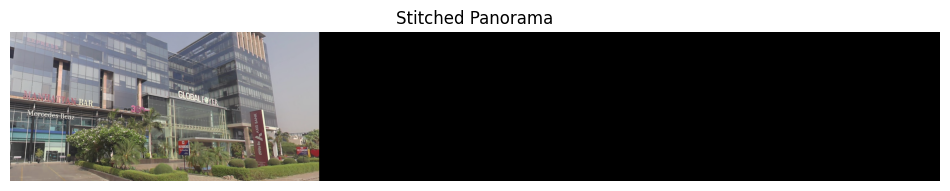

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def stitch_images(img1, img2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and descriptors
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    # BFMatcher to match descriptors
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)

    # Extract matched keypoints
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Compute Homography matrix
    H, _ = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC)

    # Warp the second image
    height1, width1 = img1.shape[:2]
    height2, width2 = img2.shape[:2]
    panorama_width = width1 + width2
    panorama_height = max(height1, height2)

    panorama = cv2.warpPerspective(img2, H, (panorama_width, panorama_height))
    panorama[0:height1, 0:width1] = img1

    return panorama

# Load images
image1 = cv2.imread("img1.jpg")
image2 = cv2.imread("img2.jpg")
image3 = cv2.imread("img3.jpg")

# Check if images are loaded correctly
if image1 is None or image2 is None or image3 is None:
    print("Error: One or more images could not be loaded. Check the file paths.")
else:
    # Stitch images together
    panorama1 = stitch_images(image1, image2)
    panorama = stitch_images(panorama1, image3)

    # Save the result
    cv2.imwrite("/mnt/data/panorama.jpg", panorama)

    # Convert BGR to RGB for displaying with Matplotlib
    panorama_rgb = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)

    # Display the stitched image
    plt.figure(figsize=(12, 6))
    plt.imshow(panorama_rgb)
    plt.axis("off")  # Hide axes
    plt.title("Stitched Panorama")
    plt.show()


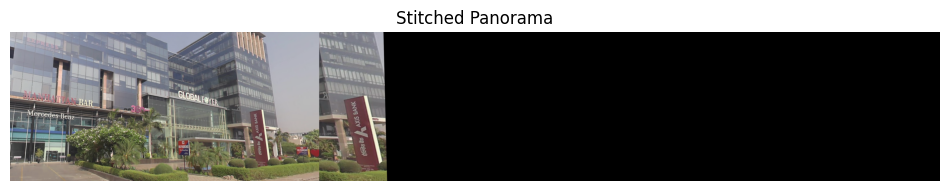

In [1]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

def match_keypoint(kp1, kp2, des1, des2):
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            left_pt = kp1[m.queryIdx].pt
            right_pt = kp2[m.trainIdx].pt
            good_matches.append([left_pt[0], left_pt[1], right_pt[0], right_pt[1]])
    return good_matches

def compute_homography(points):
    A = []
    for pt in points:
        x, y, X, Y = pt[0], pt[1], pt[2], pt[3]
        A.append([x, y, 1, 0, 0, 0, -X*x, -X*y, -X])
        A.append([0, 0, 0, x, y, 1, -Y*x, -Y*y, -Y])
    A = np.array(A)
    _, _, vh = np.linalg.svd(A)
    H = vh[-1, :].reshape(3, 3)
    return H / H[2, 2]

def ransac(good_pts, iterations=2000, threshold=5):
    best_inliers = []
    final_H = None
    for _ in range(iterations):
        random_pts = random.sample(good_pts, 4)  # Ensure unique points
        H = compute_homography(random_pts)
        inliers = []
        
        for pt in good_pts:
            p = np.array([pt[0], pt[1], 1]).reshape(3, 1)
            p_1 = np.array([pt[2], pt[3], 1]).reshape(3, 1)
            Hp = np.dot(H, p)
            Hp = Hp / Hp[2]
            dist = np.linalg.norm(p_1 - Hp)
            if dist < threshold:
                inliers.append(pt)
        
        if len(inliers) > len(best_inliers):
            best_inliers, final_H = inliers, H

    return final_H

def stitch_images(img1, img2):
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    sift = cv2.SIFT_create()

    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    good_pts = match_keypoint(keypoints1, keypoints2, descriptors1, descriptors2)
    if len(good_pts) < 4:
        print("Not enough good matches to compute homography.")
        return None
    
    H = ransac(good_pts)

    height1, width1 = img1.shape[:2]
    height2, width2 = img2.shape[:2]
    panorama_width = width1 + width2
    panorama_height = max(height1, height2)
    panorama = cv2.warpPerspective(img2, H, (panorama_width, panorama_height))
    panorama[0:height1, 0:width1] = img1
    
    return panorama

image1 = cv2.imread("img1.jpg")
image2 = cv2.imread("img2.jpg")
image3 = cv2.imread("img3.jpg")

if image1 is None or image2 is None or image3 is None:
    print("Error: One or more images could not be loaded. Check the file paths.")
else:
    panorama1 = stitch_images(image1, image2)
    if panorama1 is not None:
        panorama = stitch_images(panorama1, image3)
        if panorama is not None:
            cv2.imwrite("panorama.jpg", panorama)
            panorama_rgb = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(12, 6))
            plt.imshow(panorama_rgb)
            plt.axis("off")
            plt.title("Stitched Panorama")
            plt.show()


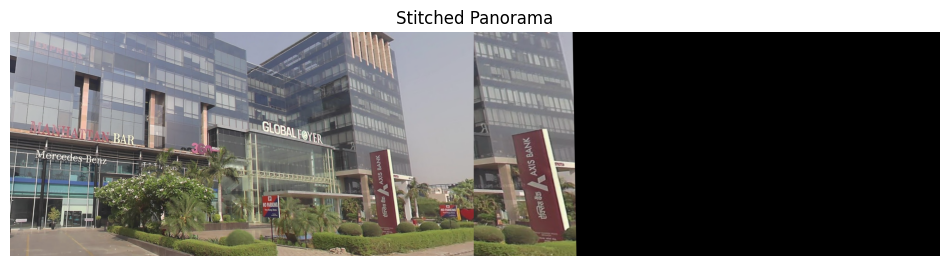

In [2]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

def match_keypoint(kp1, kp2, des1, des2):
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            left_pt = kp1[m.queryIdx].pt
            right_pt = kp2[m.trainIdx].pt
            good_matches.append([left_pt[0], left_pt[1], right_pt[0], right_pt[1]])
    return good_matches

def compute_homography(points):
    A = []
    for pt in points:
        x, y, X, Y = pt[0], pt[1], pt[2], pt[3]
        A.append([x, y, 1, 0, 0, 0, -X*x, -X*y, -X])
        A.append([0, 0, 0, x, y, 1, -Y*x, -Y*y, -Y])
    A = np.array(A)
    _, _, vh = np.linalg.svd(A)
    H = vh[-1, :].reshape(3, 3)
    return H / H[2, 2]

def ransac(good_pts, iterations=2000, threshold=5):
    best_inliers = []
    final_H = None
    for _ in range(iterations):
        random_pts = random.sample(good_pts, 4)  # Ensure unique points
        H = compute_homography(random_pts)
        inliers = []
        
        for pt in good_pts:
            p = np.array([pt[0], pt[1], 1]).reshape(3, 1)
            p_1 = np.array([pt[2], pt[3], 1]).reshape(3, 1)
            Hp = np.dot(H, p)
            Hp = Hp / Hp[2]
            dist = np.linalg.norm(p_1 - Hp)
            if dist < threshold:
                inliers.append(pt)
        
        if len(inliers) > len(best_inliers):
            best_inliers, final_H = inliers, H

    return final_H

def stitch_images(img1, img2):
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    sift = cv2.SIFT_create()

    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    good_pts = match_keypoint(keypoints1, keypoints2, descriptors1, descriptors2)
    if len(good_pts) < 4:
        print("Not enough good matches to compute homography.")
        return None
    
    H = ransac(good_pts)

    height1, width1 = img1.shape[:2]
    height2, width2 = img2.shape[:2]
    panorama_width = width1 + width2
    panorama_height = max(height1, height2)
    panorama = cv2.warpPerspective(img2, H, (panorama_width, panorama_height))
    panorama[0:height1, 0:width1] = img1
    
    return panorama

# Load only two images
image1 = cv2.imread("img1.jpg")
image2 = cv2.imread("img2.jpg")

if image1 is None or image2 is None:
    print("Error: One or both images could not be loaded. Check the file paths.")
else:
    panorama = stitch_images(image1, image2)
    if panorama is not None:
        cv2.imwrite("panorama.jpg", panorama)
        panorama_rgb = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(12, 6))
        plt.imshow(panorama_rgb)
        plt.axis("off")
        plt.title("Stitched Panorama")
        plt.show()


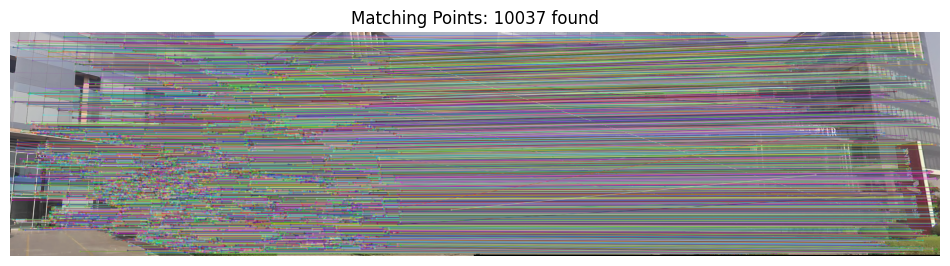

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def match_keypoints(img1, img2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    # Use BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    # Apply ratio test to keep good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Draw matches
    matched_image = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, 
                                    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return matched_image, keypoints1, keypoints2, good_matches

# Load the images
image1 = cv2.imread("img1.jpg")
image2 = cv2.imread("img2.jpg")

if image1 is None or image2 is None:
    print("Error: One or both images could not be loaded. Check the file paths.")
else:
    matched_img, kp1, kp2, matches = match_keypoints(image1, image2)

    # Convert image to RGB for Matplotlib
    matched_img_rgb = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)

    # Display the matched image
    plt.figure(figsize=(12, 6))
    plt.imshow(matched_img_rgb)
    plt.axis("off")
    plt.title(f"Matching Points: {len(matches)} found")
    plt.show()


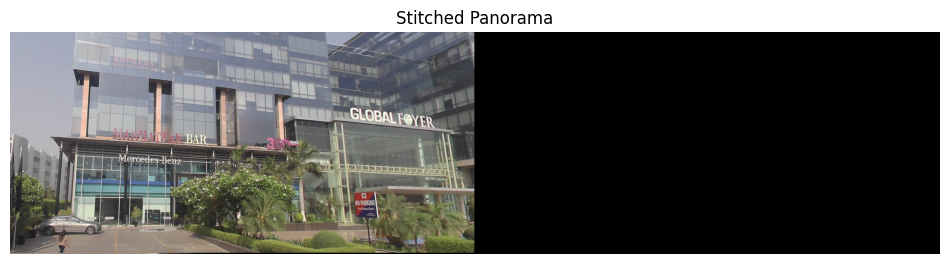

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def match_keypoints(img1, img2):
    """Finds keypoints and matches them using SIFT and BFMatcher."""
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    # Apply ratio test to filter good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    return keypoints1, keypoints2, good_matches

def stitch_images(img1, img2):
    """Finds keypoints, matches them, estimates homography, and stitches images."""
    kp1, kp2, matches = match_keypoints(img1, img2)

    if len(matches) < 4:
        print("Not enough matches to compute homography!")
        return None

    # Extract matching points
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Compute homography using RANSAC
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Warp the second image onto the first one
    height1, width1 = img1.shape[:2]
    height2, width2 = img2.shape[:2]

    # Get the resulting panorama size
    panorama_width = width1 + width2
    panorama_height = max(height1, height2)

    # Warp the second image using homography
    panorama = cv2.warpPerspective(img2, H, (panorama_width, panorama_height))
    panorama[0:height1, 0:width1] = img1  # Overlay the first image

    return panorama

# Load the images
image1 = cv2.imread("img3.jpg")
image2 = cv2.imread("img2.jpg")

if image1 is None or image2 is None:
    print("Error: One or both images could not be loaded. Check the file paths.")
else:
    panorama = stitch_images(image1, image2)
    
    if panorama is not None:
        # Save and display the result
        cv2.imwrite("stitched_panorama.jpg", panorama)
        panorama_rgb = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(12, 6))
        plt.imshow(panorama_rgb)
        plt.axis("off")
        plt.title("Stitched Panorama")
        plt.show()


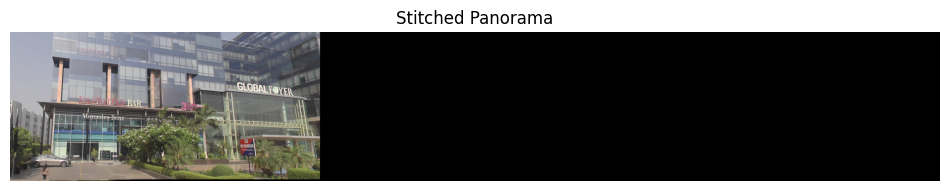

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def match_keypoints(img1, img2):
    """Finds keypoints and matches them using SIFT and BFMatcher."""
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    # Apply Lowe's ratio test
    good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

    return keypoints1, keypoints2, good_matches

def stitch_images(img1, img2):
    """Finds keypoints, matches them, estimates homography, and stitches images."""
    kp1, kp2, matches = match_keypoints(img1, img2)

    if len(matches) < 4:
        print("Not enough matches to compute homography!")
        return None

    # Extract matching points
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Compute homography using RANSAC
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Warp second image onto the first one
    height1, width1 = img1.shape[:2]
    height2, width2 = img2.shape[:2]

    panorama_width = width1 + width2
    panorama_height = max(height1, height2)

    # Warp img2 to img1’s perspective
    panorama = cv2.warpPerspective(img2, H, (panorama_width, panorama_height))
    panorama[0:height1, 0:width1] = img1  # Overlay img1

    return panorama

# Load images
image1 = cv2.imread("img3.jpg")
image2 = cv2.imread("img2.jpg")
image3 = cv2.imread("img1.jpg")

if image1 is None or image2 is None or image3 is None:
    print("Error: One or more images could not be loaded.")
else:
    # Stitch first two images
    panorama1 = stitch_images(image1, image2)

    if panorama1 is not None:
        # Stitch third image to the panorama
        final_panorama = stitch_images(panorama1, image3)

        if final_panorama is not None:
            # Save and display the result
            cv2.imwrite("stitched_panorama.jpg", final_panorama)
            panorama_rgb = cv2.cvtColor(final_panorama, cv2.COLOR_BGR2RGB)

            plt.figure(figsize=(12, 6))
            plt.imshow(panorama_rgb)
            plt.axis("off")
            plt.title("Stitched Panorama")
            plt.show()


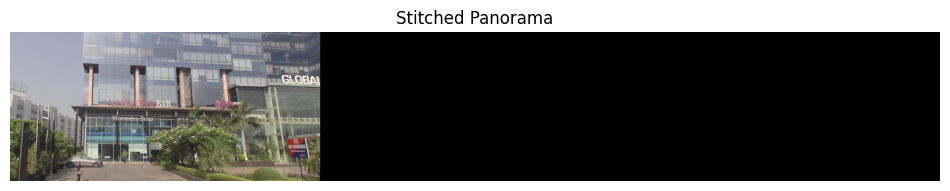

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def match_keypoints(img1, img2):
    """Finds keypoints and matches them using SIFT and BFMatcher."""
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    # Apply Lowe's ratio test
    good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

    return keypoints1, keypoints2, good_matches

def stitch_images(img1, img2):
    """Finds keypoints, matches them, estimates homography, and stitches images."""
    kp1, kp2, matches = match_keypoints(img1, img2)

    if len(matches) < 4:
        print("Not enough matches to compute homography!")
        return None

    # Extract matching points
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Compute homography using RANSAC
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Warp second image onto the first one
    height1, width1 = img1.shape[:2]
    height2, width2 = img2.shape[:2]

    panorama_width = width1 + width2
    panorama_height = max(height1, height2)

    # Warp img2 to img1’s perspective
    panorama = cv2.warpPerspective(img2, H, (panorama_width, panorama_height))
    panorama[0:height1, 0:width1] = img1  # Overlay img1

    return panorama

# Load images
image1 = cv2.imread("imagee1.png")
image2 = cv2.imread("imagee2.png")
image3 = cv2.imread("imagee3.png")

if image1 is None or image2 is None or image3 is None:
    print("Error: One or more images could not be loaded.")
else:
    # Stitch first two images
    panorama1 = stitch_images(image1, image2)

    if panorama1 is not None:
        # Stitch third image to the panorama
        final_panorama = stitch_images(panorama1, image3)

        if final_panorama is not None:
            # Save and display the result
            cv2.imwrite("stitched_panorama.jpg", final_panorama)
            panorama_rgb = cv2.cvtColor(final_panorama, cv2.COLOR_BGR2RGB)

            plt.figure(figsize=(12, 6))
            plt.imshow(panorama_rgb)
            plt.axis("off")
            plt.title("Stitched Panorama")
            plt.show()


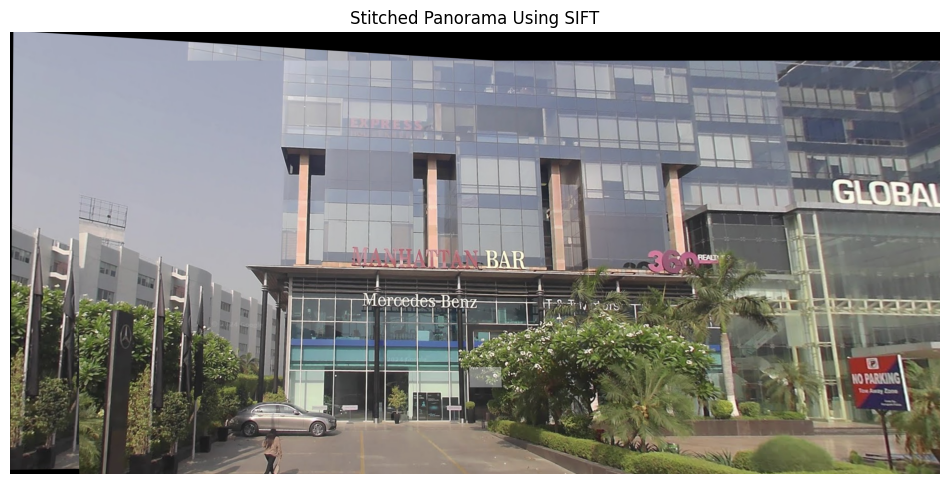

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_and_match_features(img1, img2):
    """Detects SIFT keypoints and matches them using BFMatcher."""
    sift = cv2.SIFT_create()

    # Convert to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Detect SIFT keypoints and compute descriptors
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    # Use BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    # Apply Lowe's ratio test
    good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

    return keypoints1, keypoints2, good_matches

def find_homography(kp1, kp2, matches):
    """Finds homography using RANSAC based on matched keypoints."""
    if len(matches) < 4:
        print("Not enough good matches to compute homography!")
        return None

    # Extract matching points
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Compute homography using RANSAC
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    return H

def stitch_images(img1, img2):
    """Stitches two images using SIFT feature matching and homography."""
    kp1, kp2, matches = detect_and_match_features(img1, img2)
    H = find_homography(kp1, kp2, matches)

    if H is None:
        print("Failed to compute homography.")
        return None

    # Get image dimensions
    height1, width1 = img1.shape[:2]
    height2, width2 = img2.shape[:2]

    # Get coordinates of image corners
    corners_img2 = np.float32([[0, 0], [0, height2], [width2, height2], [width2, 0]]).reshape(-1, 1, 2)
    transformed_corners = cv2.perspectiveTransform(corners_img2, H)

    # Determine new image size after warping
    points = np.concatenate((transformed_corners, np.float32([[0, 0], [0, height1], [width1, height1], [width1, 0]]).reshape(-1, 1, 2)), axis=0)
    [x_min, y_min] = np.int32(points.min(axis=0).ravel())
    [x_max, y_max] = np.int32(points.max(axis=0).ravel())

    translation_matrix = np.array([[1, 0, -x_min], [0, 1, -y_min], [0, 0, 1]])  # Offset to fit images in frame

    panorama = cv2.warpPerspective(img2, translation_matrix @ H, (x_max - x_min, y_max - y_min))
    panorama[-y_min:height1 - y_min, -x_min:width1 - x_min] = img1  # Overlay img1

    return panorama

# Load images
image1 = cv2.imread("imagee1.png")
image2 = cv2.imread("imagee2.png")

if image1 is None or image2 is None:
    print("Error: One or more images could not be loaded.")
else:
    panorama = stitch_images(image1, image2)

    if panorama is not None:
        cv2.imwrite("stitched_sift_panorama.jpg", panorama)
        panorama_rgb = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)

        # Display the result
        plt.figure(figsize=(12, 6))
        plt.imshow(panorama_rgb)
        plt.axis("off")
        plt.title("Stitched Panorama Using SIFT")
        plt.show()


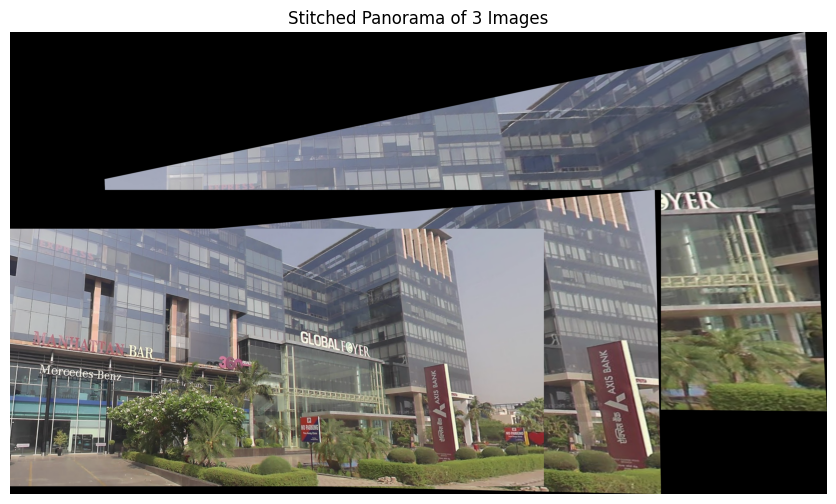

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_and_match_features(img1, img2):
    """Detects SIFT keypoints and matches them using BFMatcher."""
    sift = cv2.SIFT_create()

    # Convert to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Detect SIFT keypoints and compute descriptors
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    # Use BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    # Apply Lowe's ratio test
    good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

    return keypoints1, keypoints2, good_matches

def find_homography(kp1, kp2, matches):
    """Finds homography using RANSAC based on matched keypoints."""
    if len(matches) < 4:
        print("Not enough good matches to compute homography!")
        return None

    # Extract matching points
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Compute homography using RANSAC
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    return H

def stitch_images(img1, img2):
    """Stitches two images using SIFT feature matching and homography."""
    kp1, kp2, matches = detect_and_match_features(img1, img2)
    H = find_homography(kp1, kp2, matches)

    if H is None:
        print("Failed to compute homography.")
        return None

    # Get image dimensions
    height1, width1 = img1.shape[:2]
    height2, width2 = img2.shape[:2]

    # Get coordinates of image corners
    corners_img2 = np.float32([[0, 0], [0, height2], [width2, height2], [width2, 0]]).reshape(-1, 1, 2)
    transformed_corners = cv2.perspectiveTransform(corners_img2, H)

    # Determine new image size after warping
    points = np.concatenate((transformed_corners, np.float32([[0, 0], [0, height1], [width1, height1], [width1, 0]]).reshape(-1, 1, 2)), axis=0)
    [x_min, y_min] = np.int32(points.min(axis=0).ravel())
    [x_max, y_max] = np.int32(points.max(axis=0).ravel())

    translation_matrix = np.array([[1, 0, -x_min], [0, 1, -y_min], [0, 0, 1]])  # Offset to fit images in frame

    panorama = cv2.warpPerspective(img2, translation_matrix @ H, (x_max - x_min, y_max - y_min))
    panorama[-y_min:height1 - y_min, -x_min:width1 - x_min] = img1  # Overlay img1

    return panorama

# Load images
image1 = cv2.imread("img1.jpg")
image2 = cv2.imread("img2.jpg")
image3 = cv2.imread("img3.jpg")

if image1 is None or image2 is None or image3 is None:
    print("Error: One or more images could not be loaded.")
else:
    # Stitch first two images
    panorama1 = stitch_images(image1, image2)

    if panorama1 is not None:
        # Stitch the result with the third image
        panorama = stitch_images(panorama1, image3)

        if panorama is not None:
            cv2.imwrite("stitched_3images_panorama.jpg", panorama)
            panorama_rgb = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)

            # Display the result
            plt.figure(figsize=(12, 6))
            plt.imshow(panorama_rgb)
            plt.axis("off")
            plt.title("Stitched Panorama of 3 Images")
            plt.show()

In [13]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

def match_keypoint(kp1, kp2, des1, des2):
    k = 2
    all_matches = []
    for i, d1 in enumerate(des1):
        dist = []
        for j, d2 in enumerate(des2):
            dist.append([i, j, np.linalg.norm(d1 - d2)])
        dist.sort(key=lambda x: x[2])
        all_matches.append(dist[:k])
    
    good_matches = []
    for m, n in all_matches:
        if m[2] < 0.75 * n[2]:
            left_pt = kp1[m[0]].pt
            right_pt = kp2[m[1]].pt
            good_matches.append([left_pt[0], left_pt[1], right_pt[0], right_pt[1]])
    return good_matches

def compute_homography(points):
    A = []
    for pt in points:
        x, y, X, Y = pt[0], pt[1], pt[2], pt[3]
        A.append([x, y, 1, 0, 0, 0, -X*x, -X*y, -X])
        A.append([0, 0, 0, x, y, 1, -Y*x, -Y*y, -Y])
    A = np.array(A)
    _, _, vh = np.linalg.svd(A)
    H = vh[-1, :].reshape(3, 3)
    return H / H[2, 2]

def ransac(good_pts):
    best_inliers = []
    final_H = None
    for _ in range(5000):
        random_pts = random.choices(good_pts, k=4)
        H = compute_homography(random_pts)
        inliers = []
        t = 5
        for pt in good_pts:
            p = np.array([pt[0], pt[1], 1]).reshape(3, 1)
            p_1 = np.array([pt[2], pt[3], 1]).reshape(3, 1)
            Hp = np.dot(H, p)
            Hp = Hp / Hp[2]
            dist = np.linalg.norm(p_1 - Hp)
            if dist < t:
                inliers.append(pt)
        if len(inliers) > len(best_inliers):
            best_inliers, final_H = inliers, H
    return final_H

def stitch_images(img1, img2):
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    sift = cv2.xfeatures2d.SIFT_create()
    surf = cv2.xfeatures2d.SURF_create()

    keypoints1 = sift.detect(gray1, None)
    keypoints1, descriptors1 = surf.compute(gray1, keypoints1)
    keypoints2 = sift.detect(gray2, None)
    keypoints2, descriptors2 = surf.compute(gray2, keypoints2)
    
    good_pts = match_keypoint(keypoints1, keypoints2, descriptors1, descriptors2)
    H = ransac(good_pts)

    height1, width1 = img1.shape[:2]
    height2, width2 = img2.shape[:2]
    panorama_width = width1 + width2
    panorama_height = max(height1, height2)
    panorama = cv2.warpPerspective(img2, H, (panorama_width, panorama_height))
    panorama[0:height1, 0:width1] = img1
    
    return panorama

image1 = cv2.imread("/mnt/data/Screenshot 2025-02-12 at 2.58.53 PM.png")
image2 = cv2.imread("/mnt/data/Screenshot 2025-02-12 at 2.59.10 PM.png")
image3 = cv2.imread("/mnt/data/Screenshot 2025-02-12 at 2.59.26 PM.png")

if image1 is None or image2 is None or image3 is None:
    print("Error: One or more images could not be loaded. Check the file paths.")
else:
    panorama1 = stitch_images(image1, image2)
    panorama = stitch_images(panorama1, image3)
    cv2.imwrite("/mnt/data/panorama.jpg", panorama)
    panorama_rgb = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 6))
    plt.imshow(panorama_rgb)
    plt.axis("off")
    plt.title("Stitched Panorama")
    plt.show()


Error: One or more images could not be loaded. Check the file paths.


[ WARN:0@2982.177] global loadsave.cpp:241 findDecoder imread_('/mnt/data/Screenshot 2025-02-12 at 2.58.53 PM.png'): can't open/read file: check file path/integrity
[ WARN:0@2982.180] global loadsave.cpp:241 findDecoder imread_('/mnt/data/Screenshot 2025-02-12 at 2.59.10 PM.png'): can't open/read file: check file path/integrity
[ WARN:0@2982.181] global loadsave.cpp:241 findDecoder imread_('/mnt/data/Screenshot 2025-02-12 at 2.59.26 PM.png'): can't open/read file: check file path/integrity


In [ ]:
import cv2
import numpy as np
import random

def solution(left_img, right_img):
    key_points1, descriptor1, key_points2, descriptor2 = get_keypoint(left_img, right_img)
    good_matches = match_keypoint(key_points1, key_points2, descriptor1, descriptor2)
    final_H = ransac(good_matches)

    rows1, cols1 = right_img.shape[:2]
    rows2, cols2 = left_img.shape[:2]

    points1 = np.float32([[0,0], [0,rows1], [cols1,rows1], [cols1,0]]).reshape(-1,1,2)
    points  = np.float32([[0,0], [0,rows2], [cols2,rows2], [cols2,0]]).reshape(-1,1,2)
    points2 = cv2.perspectiveTransform(points, final_H)
    list_of_points = np.concatenate((points1, points2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

    H_translation = (np.array([[1, 0, (-x_min)], [0, 1, (-y_min)], [0, 0, 1]])).dot(final_H)

    output_img = cv2.warpPerspective(left_img, H_translation, (x_max - x_min, y_max - y_min))
    output_img[(-y_min):rows1+(-y_min), (-x_min):cols1+(-x_min)] = right_img

    cv2.imshow('Final Panorama', output_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return output_img
    

def get_keypoint(left_img, right_img):
    l_img = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
    r_img = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('Left Grayscale', l_img)
    cv2.imshow('Right Grayscale', r_img)
    cv2.waitKey(0)

    sift = cv2.SIFT_create()
    key_points1, descriptor1 = sift.detectAndCompute(l_img, None)
    key_points2, descriptor2 = sift.detectAndCompute(r_img, None)
    
    l_img_kp = cv2.drawKeypoints(left_img, key_points1, None)
    r_img_kp = cv2.drawKeypoints(right_img, key_points2, None)
    
    cv2.imshow('Left Image Keypoints', l_img_kp)
    cv2.imshow('Right Image Keypoints', r_img_kp)
    cv2.waitKey(0)
    
    return key_points1, descriptor1, key_points2, descriptor2

def match_keypoint(key_points1, key_points2, descriptor1, descriptor2):
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptor1, descriptor2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            left_pt = key_points1[m.queryIdx].pt
            right_pt = key_points2[m.trainIdx].pt
            good_matches.append([left_pt[0], left_pt[1], right_pt[0], right_pt[1]])

    img_matches = cv2.drawMatchesKnn(left_img, key_points1, right_img, key_points2, [matches[:20]], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    cv2.imshow('Keypoint Matches', img_matches)
    cv2.waitKey(0)
    
    return good_matches

def homography(points):
    A = []
    for pt in points:
        x, y = pt[0], pt[1]
        X, Y = pt[2], pt[3]
        A.append([x, y, 1, 0, 0, 0, -X*x, -X*y, -X])
        A.append([0, 0, 0, x, y, 1, -Y*x, -Y*y, -Y])
    A = np.array(A)
    _, _, vh = np.linalg.svd(A)
    H = vh[-1, :].reshape(3, 3)
    return H / H[2, 2]

def ransac(good_pts):
    best_inliers = []
    final_H = []
    t = 5
    for _ in range(5000):
        random_pts = random.choices(good_pts, k=4)
        H = homography(random_pts)
        inliers = []
        for pt in good_pts:
            p = np.array([pt[0], pt[1], 1]).reshape(3, 1)
            p_1 = np.array([pt[2], pt[3], 1]).reshape(3, 1)
            Hp = np.dot(H, p)
            Hp = Hp / Hp[2]
            dist = np.linalg.norm(p_1 - Hp)
            if dist < t:
                inliers.append(pt)
        if len(inliers) > len(best_inliers):
            best_inliers, final_H = inliers, H
    return final_H

if __name__ == "__main__":
    left_img = cv2.imread('left.jpg')
    right_img = cv2.imread('right.jpg')
    result_img = solution(left_img, right_img)
    cv2.imwrite('results/task1_result.jpg', result_img)

2025-02-12 16:09:28.302 Python[47986:200274] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-12 16:09:28.302 Python[47986:200274] +[IMKInputSession subclass]: chose IMKInputSession_Modern


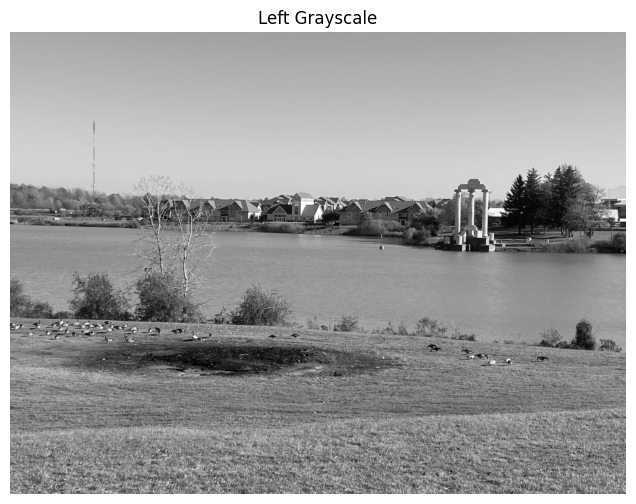

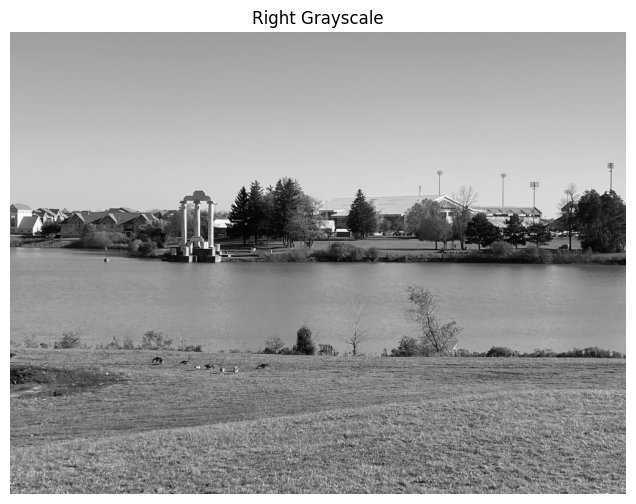

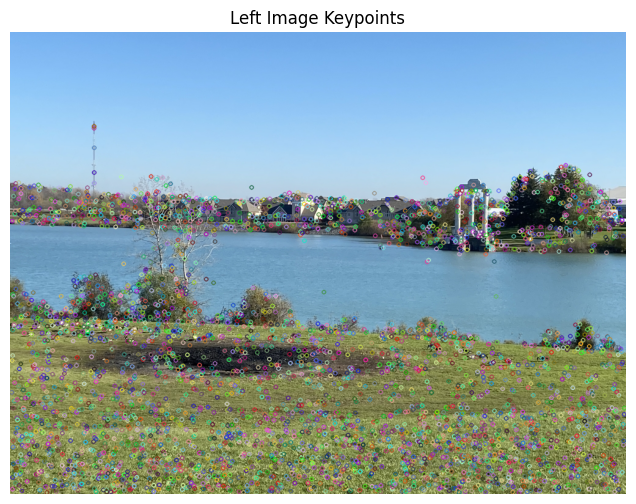

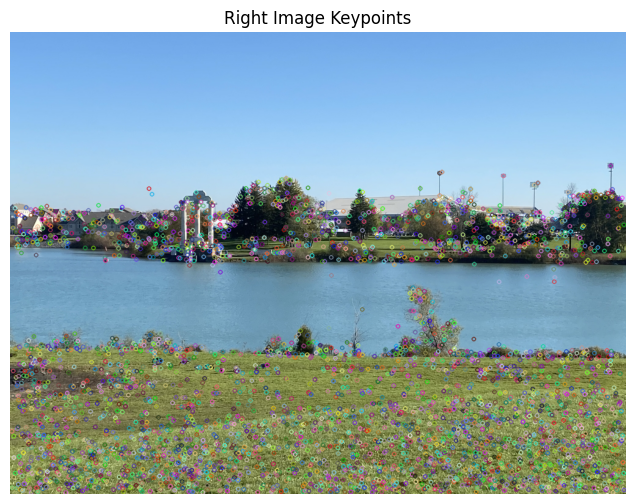

2025-02-12 16:13:10.742 Python[50237:244782] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-12 16:13:10.742 Python[50237:244782] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [ ]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

def solution(left_img, right_img):
    key_points1, descriptor1, key_points2, descriptor2 = get_keypoint(left_img, right_img)
    good_matches = match_keypoint(left_img, right_img, key_points1, key_points2, descriptor1, descriptor2)
    final_H = ransac(good_matches)

    rows1, cols1 = right_img.shape[:2]
    rows2, cols2 = left_img.shape[:2]

    points1 = np.float32([[0,0], [0,rows1], [cols1,rows1], [cols1,0]]).reshape(-1,1,2)
    points  = np.float32([[0,0], [0,rows2], [cols2,rows2], [cols2,0]]).reshape(-1,1,2)
    points2 = cv2.perspectiveTransform(points, final_H)
    list_of_points = np.concatenate((points1, points2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

    H_translation = (np.array([[1, 0, (-x_min)], [0, 1, (-y_min)], [0, 0, 1]])).dot(final_H)

    output_img = cv2.warpPerspective(left_img, H_translation, (x_max - x_min, y_max - y_min))
    output_img[(-y_min):rows1+(-y_min), (-x_min):cols1+(-x_min)] = right_img

    show_image("Final Panorama", output_img)
    
    return output_img
    

def get_keypoint(left_img, right_img):
    l_img = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
    r_img = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)
    
    show_image("Left Grayscale", l_img, cmap="gray")
    show_image("Right Grayscale", r_img, cmap="gray")

    sift = cv2.SIFT_create()
    key_points1, descriptor1 = sift.detectAndCompute(l_img, None)
    key_points2, descriptor2 = sift.detectAndCompute(r_img, None)
    
    l_img_kp = cv2.drawKeypoints(left_img, key_points1, None)
    r_img_kp = cv2.drawKeypoints(right_img, key_points2, None)
    
    show_image("Left Image Keypoints", l_img_kp)
    show_image("Right Image Keypoints", r_img_kp)
    
    return key_points1, descriptor1, key_points2, descriptor2

def match_keypoint(left_img, right_img, key_points1, key_points2, descriptor1, descriptor2):
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptor1, descriptor2, k=2)

    good_matches = []
    knn_good_matches = []  # Store good matches in the correct format for drawMatchesKnn

    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            left_pt = key_points1[m.queryIdx].pt
            right_pt = key_points2[m.trainIdx].pt
            good_matches.append([left_pt[0], left_pt[1], right_pt[0], right_pt[1]])
            knn_good_matches.append([m])  # `cv2.drawMatchesKnn` expects a list of lists

    img_matches = cv2.drawMatchesKnn(left_img, key_points1, right_img, key_points2, knn_good_matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    cv2.imshow("Keypoint Matches", img_matches)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return good_matches

def homography(points):
    A = []
    for pt in points:
        x, y = pt[0], pt[1]
        X, Y = pt[2], pt[3]
        A.append([x, y, 1, 0, 0, 0, -X*x, -X*y, -X])
        A.append([0, 0, 0, x, y, 1, -Y*x, -Y*y, -Y])
    A = np.array(A)
    _, _, vh = np.linalg.svd(A)
    H = vh[-1, :].reshape(3, 3)
    return H / H[2, 2]

def ransac(good_pts):
    best_inliers = []
    final_H = []
    t = 5
    for _ in range(5000):
        random_pts = random.choices(good_pts, k=4)
        H = homography(random_pts)
        inliers = []
        for pt in good_pts:
            p = np.array([pt[0], pt[1], 1]).reshape(3, 1)
            p_1 = np.array([pt[2], pt[3], 1]).reshape(3, 1)
            Hp = np.dot(H, p)
            Hp = Hp / Hp[2]
            dist = np.linalg.norm(p_1 - Hp)
            if dist < t:
                inliers.append(pt)
        if len(inliers) > len(best_inliers):
            best_inliers, final_H = inliers, H
    return final_H

def show_image(title, img, cmap=None):
    plt.figure(figsize=(8, 6))
    if len(img.shape) == 2:  # Grayscale image
        plt.imshow(img, cmap=cmap)
    else:  # Convert BGR to RGB for OpenCV images
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    left_img = cv2.imread('left.jpg')
    right_img = cv2.imread('right.jpg')
    result_img = solution(left_img, right_img)
    cv2.imwrite('results/task1_result.jpg', result_img)


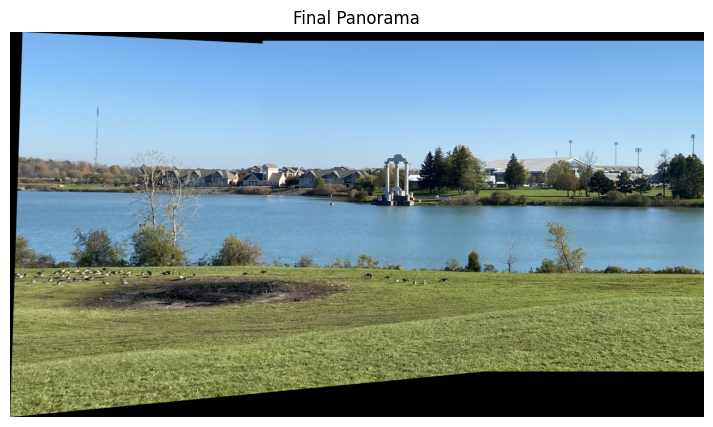

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def solution(left_img, right_img):
    key_points1, descriptor1, key_points2, descriptor2 = get_keypoint(left_img, right_img)
    good_matches = match_keypoint(key_points1, key_points2, descriptor1, descriptor2)
    final_H = ransac(good_matches)

    rows1, cols1 = right_img.shape[:2]
    rows2, cols2 = left_img.shape[:2]

    points1 = np.float32([[0,0], [0,rows1], [cols1,rows1], [cols1,0]]).reshape(-1,1,2)
    points2 = np.float32([[0,0], [0,rows2], [cols2,rows2], [cols2,0]]).reshape(-1,1,2)
    points2 = cv2.perspectiveTransform(points2, final_H)
    
    list_of_points = np.concatenate((points1, points2), axis=0)
    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

    H_translation = np.array([[1, 0, -x_min], [0, 1, -y_min], [0, 0, 1]]) @ final_H
    output_img = cv2.warpPerspective(left_img, H_translation, (x_max - x_min, y_max - y_min))
    output_img[-y_min:rows1-y_min, -x_min:cols1-x_min] = right_img

    # **Show the final stitched image using Matplotlib**
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Final Panorama")
    plt.show()

    return output_img

def get_keypoint(left_img, right_img):
    sift = cv2.SIFT_create()
    key_points1, descriptor1 = sift.detectAndCompute(left_img, None)
    key_points2, descriptor2 = sift.detectAndCompute(right_img, None)

    return key_points1, descriptor1, key_points2, descriptor2

def match_keypoint(key_points1, key_points2, descriptor1, descriptor2):
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptor1, descriptor2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            left_pt = key_points1[m.queryIdx].pt
            right_pt = key_points2[m.trainIdx].pt
            good_matches.append([left_pt[0], left_pt[1], right_pt[0], right_pt[1]])

    return good_matches

def homography(points):
    A = []
    for pt in points:
        x, y, X, Y = pt
        A.append([x, y, 1, 0, 0, 0, -X*x, -X*y, -X])
        A.append([0, 0, 0, x, y, 1, -Y*x, -Y*y, -Y])
    A = np.array(A)
    _, _, vh = np.linalg.svd(A)
    H = vh[-1, :].reshape(3, 3)
    return H / H[2, 2]

def ransac(good_pts, iterations=5000, threshold=5):
    best_inliers = []
    final_H = None

    for _ in range(iterations):
        random_pts = random.choices(good_pts, k=4)
        H = homography(random_pts)
        inliers = []

        for pt in good_pts:
            p = np.array([pt[0], pt[1], 1]).reshape(3, 1)
            p_1 = np.array([pt[2], pt[3], 1]).reshape(3, 1)
            Hp = np.dot(H, p)
            Hp /= Hp[2]
            dist = np.linalg.norm(p_1 - Hp)
            if dist < threshold:
                inliers.append(pt)

        if len(inliers) > len(best_inliers):
            best_inliers, final_H = inliers, H

    return final_H

if __name__ == "__main__":
    left_img = cv2.imread('left.jpg')
    right_img = cv2.imread('right.jpg')

    if left_img is None or right_img is None:
        print("Error: Could not load images. Check the file paths.")
    else:
        result_img = solution(left_img, right_img)
        cv2.imwrite('stitched_image.jpg', result_img)